# Rede neural LSTM para predição de ocupação de interface de rede

## Parte 1

**Descrição do problema**

Em empresas de serviço de internet o congestionamento de interfaces em rede de computadores é uma preocupação constante pois, quando ocorre, pode afetar a experiência de um grande cluster de usuários.

Os métodos tradicionais envolvem o monitoramento da ocupação das interfaces de rede através de relatórios e a atuação quando a ocupação atinge determinados critérios. Trabalhando, portanto, de forma reativa quando o problema já ocorreu.

**Solução de Machine Learning**

A utilização de machine learning na previsão de ocupação de interfaces de rede poderia antecipar a previsão do congestionamentos e otimizar o desempenho das redes de comunicação. Dessa forma, poderia permitir que as equipes de operações de rede adotem uma postura proativa, ajustando recursos, redirecionando fluxos de dados e evitando congestionamentos antes que eles impactem negativamente os usuários finais.

## Parte 2

Para a tarefa de previsão da ocupação futura de interface de rede será utilizada técnica de machine learning supervisionada utilizando sequencias históricas para o treinamento. Os dados a serem utilizados foram coletados de ferramenta de monitoramento de interface de rede e consiste de apenas duas colunas, o momento da coleta e a utilização do link naquele momento.

A técnica escolhida para realizar essa regressão foi a utilização de uma rede neural utilizando células LSTM. 

Uma rede neural LSTM (Long Short-Term Memory) é uma arquitetura de rede neural recorrente (RNN) especializada em modelar e processar dados sequenciais, sendo eficaz na captura de dependências temporais de longo prazo. A principal característica das LSTMs é a sua capacidade de "memória de longo prazo". Elas são compostas por unidades de células de memória que podem reter informações relevantes por longos períodos de tempo. Ela é capaz de "lembrar" eventos recentes e utilizar isso para fazer as previsões.

**Avaliação**

Para a avaliação será utilizada a técnica Holdout, em que o conjunto de dados será dividido em grupo de treinamento e grupo de teste. Após realizado o treinamento, o modelo será utilizado para prever o grupo de teste e esse resultado será avaliado com as métricas de desempenho a seguir:

- Erro Médio Absoluto (Mean Absolute Error - MAE)
- Erro Quadrático Médio (Mean Squared Error - MSE)
- Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE)
- R² (R-squared)

Explicação das métricas selecionadas:

**MAE**: mede a média absoluta das diferenças entre as previsões do modelo e os valores reais. Ele fornece uma ideia direta de quão longe, em média, as previsões do modelo estão dos valores reais. O MAE é fácil de entender e interpretar, pois está na mesma escala dos dados originais.

**RMSE**: é simplesmente a raiz quadrada do MSE. Ele é frequentemente usado quando se deseja expressar o erro médio em unidades originais dos dados.

**R² (R-squared)**: mede o quão bem as previsões do modelo se ajustam aos dados reais. Um valor R² próximo de 1 indica um bom ajuste, enquanto valores próximos de 0 indicam um mau ajuste.

Além disso, será visualizada a curva de loss do treinamento para avaliar se o modelo está conseguindo minimizar o erro e consequentemente "aprendendo".

Por fim, será realizado um plot para visualizar as previsões do modelo em comparação com os dados reais usando gráficos. Isso pode ajudar a identificar tendências, sazonalidades e erros no modelo.

**Referencia:**
Foi utilizado o seguinte artigo de congresso como referencia para esse projeto:

M. Labonne, C. Chatzinakis and A. Olivereau, "Predicting Bandwidth Utilization on Network Links Using Machine Learning," 2020 European Conference on Networks and Communications (EuCNC), Dubrovnik, Croatia, 2020, pp. 242-247, doi: 10.1109/EuCNC48522.2020.9200910.

## Parte 3

### Implementação da solução

Importar as bibliotecas necessárias e importar os dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
df = pd.read_csv('utilizacao.csv')
data = df["utilization"].values

In [3]:
df.shape

(15524, 7)

Normalizar os dados e Separá-los entre conjunto de treinamento e teste

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [5]:
train_size = int(0.8 * len(data_scaled))
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

Preparar os dados para a LSTM

Neste passo, estamos preparando os dados para alimentar a LSTM. A LSTM é uma rede neural recorrente que aceita sequências temporais como entrada. A ideia é criar pares de entrada e saída, onde a entrada é uma sequência de dados históricos e a saída é o próximo valor na sequência. Isso permite que o modelo aprenda a reconhecer padrões e tendências nos dados temporais.

A função create_sequences que definimos recebe o conjunto de dados e o tamanho da sequência que queremos usar. Ela cria subsequências de dados contíguos para alimentar a rede.

In [6]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [7]:
sequence_length = 20  # Defina o tamanho da sequência
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [23]:
X_train.shape

(12399, 20, 1)

Criação do modelo de rede neural LSTM. O modelo consiste de uma camada do tipo LSTM com 150 unidades, e uma camada Densa de saída que retornará apenas um numero em seu retorno. A camada Densa é uma camada completamente conectada com as 150 unidades anteriores do LSTM.

In [8]:
model = Sequential()
model.add(LSTM(150, return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

Realizar o treinamento do modelo

In [9]:
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
194/194 [==============================] - 10s 30ms/step - loss: 7.4931e-04 - val_loss: 3.3630e-04
Epoch 2/30
194/194 [==============================] - 5s 28ms/step - loss: 8.2044e-05 - val_loss: 3.7171e-04
Epoch 3/30
194/194 [==============================] - 6s 29ms/step - loss: 7.3611e-05 - val_loss: 2.7903e-04
Epoch 4/30
194/194 [==============================] - 5s 27ms/step - loss: 6.7516e-05 - val_loss: 2.6345e-04
Epoch 5/30
194/194 [==============================] - 5s 28ms/step - loss: 6.1934e-05 - val_loss: 3.3890e-04
Epoch 6/30
194/194 [==============================] - 5s 27ms/step - loss: 5.8424e-05 - val_loss: 3.2653e-04
Epoch 7/30
194/194 [==============================] - 5s 27ms/step - loss: 5.2650e-05 - val_loss: 1.9969e-04
Epoch 8/30
194/194 [==============================] - 6s 28ms/step - loss: 5.2433e-05 - val_loss: 1.9762e-04
Epoch 9/30
194/194 [==============================] - 6s 28ms/step - loss: 4.6046e-05 - val_loss: 1.8646e-04
Epoch 10/30
194/19

Visualização da curva de aprendizagem

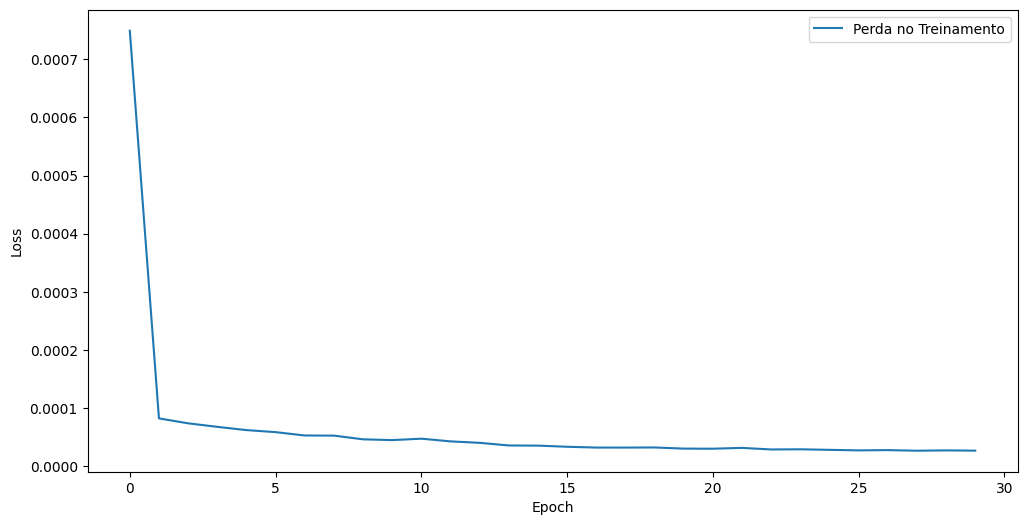

In [10]:

train_loss = history.history["loss"]

# Plotar a curva de perda
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Perda no Treinamento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

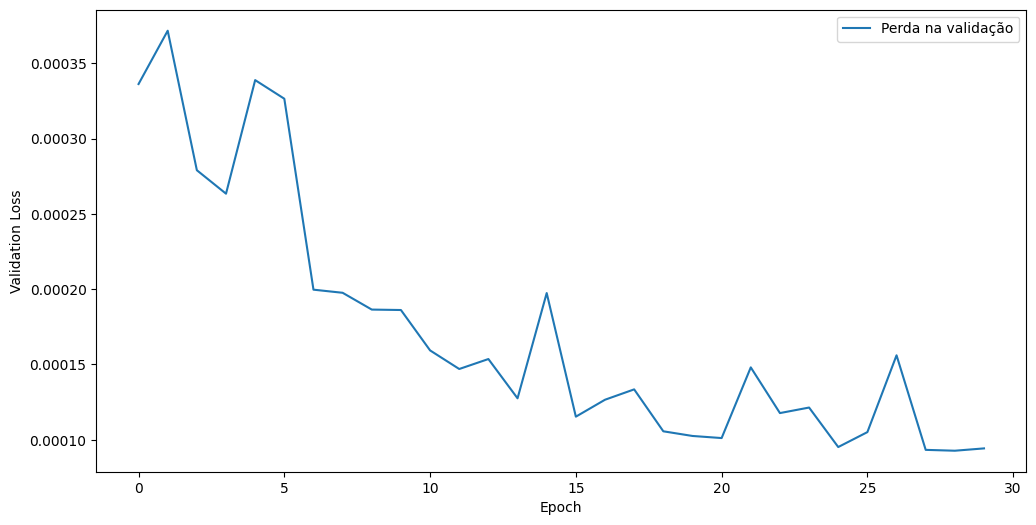

In [20]:

validation_loss = history.history["val_loss"]

# Plotar a curva de perda
plt.figure(figsize=(12, 6))
plt.plot(validation_loss, label='Perda na validação')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Realização da predição com a sequencia de teste

In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

97/97 [==============================] - 1s 6ms/step


Calcular as métricas de desempenho e plotar os resultados

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Squared Error (MSE): 3.845715100479905
Root Mean Squared Error (RMSE): 1.9610494895539747
Mean Absolute Error (MAE): 1.3897340222159262
R-squared (R2) Score: 0.9933250831955971


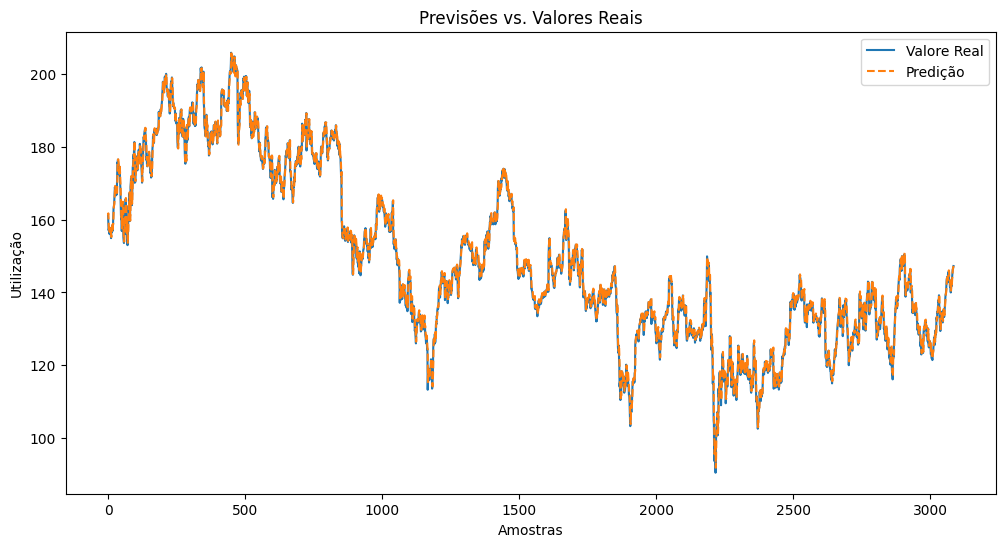

In [13]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Visualização das previsões vs. valores reais
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valore Real')
plt.plot(predictions, label='Predição', linestyle='dashed')
plt.legend()
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Amostras')
plt.ylabel('Utilização')
plt.show()

## CONCLUSÕES

A métrica MSE nos informa que, em média, o modelo está distante dos dados reais em cerca de 4Mbps ao quadrado. Tal valor é aceitável para o tipo de estimação pretendida.

A métrica RMSE nos dá uma noção que o erro médio do modelo é cerca de 2Mbps. Esse também é aceitável para o tipo de estimação pretendida.

O R² está bem proximo de 1, nos informando que o modelo está conseguindo uma boa aproximação conseguindo entregar bem a estimação pretendida.

Pelo grafico da predição podemos observer que o modelo conseguiu capturar bem as tendencias de subidas e descidas, sendo esse o principal objetivo da estimação.